# Importing needed libraries

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [ ]:
data = pd.read_csv("/content/IMDB-Dataset.csv", engine="python", error_bad_lines=False,)
data.head()

# Data Visualization


In [43]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [44]:
data['sentiment'][1]

'positive'

In [45]:
data['sentiment'].replace('positive',1,inplace=True)
data['sentiment'].replace('negative',0,inplace=True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [46]:
negative_sentiment = []
positive_sentiment = []
total_length = len(data['sentiment'])
total_length

50000

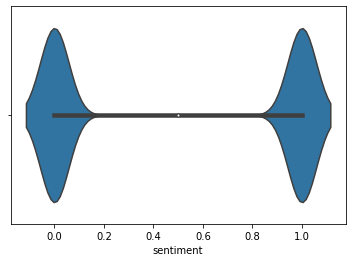

In [49]:
sns.violinplot(x='sentiment',data=data)

# Data Preprocessing

In [50]:
columns = []
for i in data.columns:
  columns.append(i)
print(columns)

['review', 'sentiment']


In [51]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [52]:
data.shape

(50000, 2)

In [53]:
data.describe()

,sentiment
count,50000.000000
mean,0.500000
std,0.500005
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [55]:
# finding the biggest data in the dataset

big = data['review'][0]
for i in data['review']:
  if len(i) > len(big):
    big = i
print(big)

Match 1: Tag Team Table Match Bubba Ray and Spike Dudley vs Eddie Guerrero and Chris Benoit Bubba Ray and Spike Dudley started things off with a Tag Team Table Match against Eddie Guerrero and Chris Benoit. According to the rules of the match, both opponents have to go through tables in order to get the win. Benoit and Guerrero heated up early on by taking turns hammering first Spike and then Bubba Ray. A German suplex by Benoit to Bubba took the wind out of the Dudley brother. Spike tried to help his brother, but the referee restrained him while Benoit and Guerrero ganged up on him in the corner. With Benoit stomping away on Bubba, Guerrero set up a table outside. Spike dashed into the ring and somersaulted over the top rope onto Guerrero on the outside! After recovering and taking care of Spike, Guerrero slipped a table into the ring and helped the Wolverine set it up. The tandem then set up for a double superplex from the middle rope which would have put Bubba through the table, but

In [71]:
# finding the smallest data in the dataset

small = data['review'][0]
for i in data['review']:
  if len(i) < len(small):
    small = i
print(small)

Read the book, forget the movie!


# Text Preprocessing

In [57]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [58]:
x = data["review"] #input
y = data["sentiment"] # output

In [59]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)
len(x[1])

998

In [60]:
sequence = tokenizer.texts_to_sequences(x)
len(sequence[1])

150

In [61]:
from keras.preprocessing.sequence import pad_sequences

In [73]:
encoded_sequence = pad_sequences(sequence,maxlen=200,padding='pre')
encoded_sequence[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    3,  393,  120,  353,    7,
          7,    1, 1385, 2977,    6,   52,   52,  155,   55, 2381, 1582,
          2,  411,    3,    2,  530,  282,    4, 1847,    5,    1,  438,
        412,    7,    7,    1,  150,   23,  568,   69, 2274,  498, 4571,
         21,   61,   45,  189,   29,    1,   18,   28,   45,   29,    1,
       2294,  175, 3336,   96,   22,   67,  371,   63,    1,  791, 9719,
         31,    1, 1825,    5, 7366, 6594,   21,   61,    6,    9,   69,
        278,    1,  147,   18,    9,    6,    3,  407,    2, 2406,  412,
          3, 4339,  353,   42,   27,    4,    1,   78,    4,  202,    2,
         24,  114,    7,    7,    1, 1847,   62,  2

In [63]:
final_input = encoded_sequence
final_output = np.array(y)

In [64]:
final_output

array([1, 1, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(final_input,final_output, test_size=0.33, random_state=42)
print(x_train.shape,y_train.shape)

(33500, 200) (33500,)


In [75]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dropout,Dense,Embedding

In [76]:
model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 120)          1200000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 200, 128)         94720     
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
prediction = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=32)

Epoch 1/2
1047/1047 [==============================] - 471s 442ms/step - loss: 0.5169 - accuracy: 0.7731 - val_loss: 0.5810 - val_accuracy: 0.6736
Epoch 2/2
1047/1047 [==============================] - 462s 441ms/step - loss: 0.6405 - accuracy: 0.7947 - val_loss: 0.5064 - val_accuracy: 0.7748


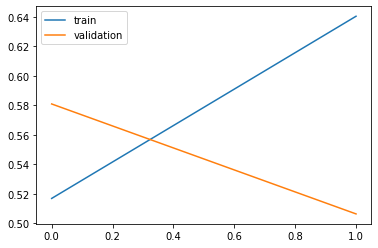

In [83]:
plt.plot(prediction.history['loss'],label='train')
plt.plot(prediction.history['val_loss'],label='validation')
plt.legend(loc='best')
plt.show()

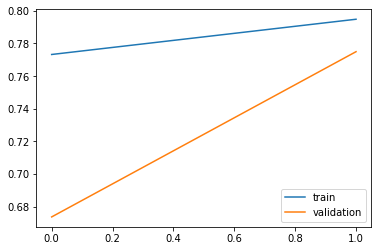

In [84]:
plt.plot(prediction.history['accuracy'],label='train')
plt.plot(prediction.history['val_accuracy'],label='validation')
plt.legend(loc='best')
plt.show()

In [85]:
model.save("imdb review.h5")

# Creating Custom review predictor bot

In [105]:
def imdb_bot(review):
  sentence_list = []
  sentence_list.append(review)
  sequence = tokenizer.texts_to_sequences(sentence_list)
  input = pad_sequences(sequence,maxlen=200,padding='pre')
  output = model.predict(input)
  if output.all() == 1:
    print("The reviews are good you should watch this")
  else:
    print("The reviews are not quite good you should try another one")

In [101]:
imdb_bot("Fantastic movie")

The reviews are good you should watch this


In [104]:
imdb_bot("Very worst movie. Dont watch")

The reviews are not quite good you should try another one
